<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Supervised Machine Learning - Linear Regression - Week 1</center></h1>


<center><img src="https://images.moneycontrol.com/static-mcnews/2021/04/Aviation-featured.jpg?impolicy=website&width=1600&height=900"

<b><h2><center>Airlines in India Flight Fare Case Study</center></h2></b>

## LIBRARY and DATA IMPORT

In [82]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
#
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
#

In [151]:
df=pd.read_csv("Clean_Dataset.csv")

## EDA

In [153]:
df.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [85]:
df.shape

(300153, 12)

In [86]:
df=df.drop(["Unnamed: 0"],axis=1)

In [88]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [87]:
df.tail(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [89]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [90]:
df.duplicated().sum() 

0

In [95]:
df["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [96]:
df['flight'].nunique()

1561

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [98]:
df["days_left"].value_counts()

25    6633
18    6602
39    6593
32    6585
26    6573
24    6542
19    6537
31    6534
33    6532
40    6531
41    6525
28    6522
38    6512
20    6502
30    6501
42    6497
22    6494
36    6490
21    6479
37    6476
43    6472
44    6436
17    6419
11    6417
34    6412
13    6404
23    6401
29    6397
12    6381
27    6360
14    6349
15    6340
45    6314
35    6291
16    6272
46    6160
49    6154
48    6078
47    6069
10    5822
8     5767
6     5740
7     5703
9     5665
5     5392
4     5077
3     4248
2     4026
1     1927
Name: days_left, dtype: int64

In [99]:
df["duration"].value_counts()

2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
41.50       1
38.75       1
41.58       1
39.25       1
44.50       1
Name: duration, Length: 476, dtype: int64

In [101]:
# separate the two sets
cat_cols = ['airline','source_city','destination_city','stops','arrival_time', 'class']
num_cols = ['duration','days_left','price']

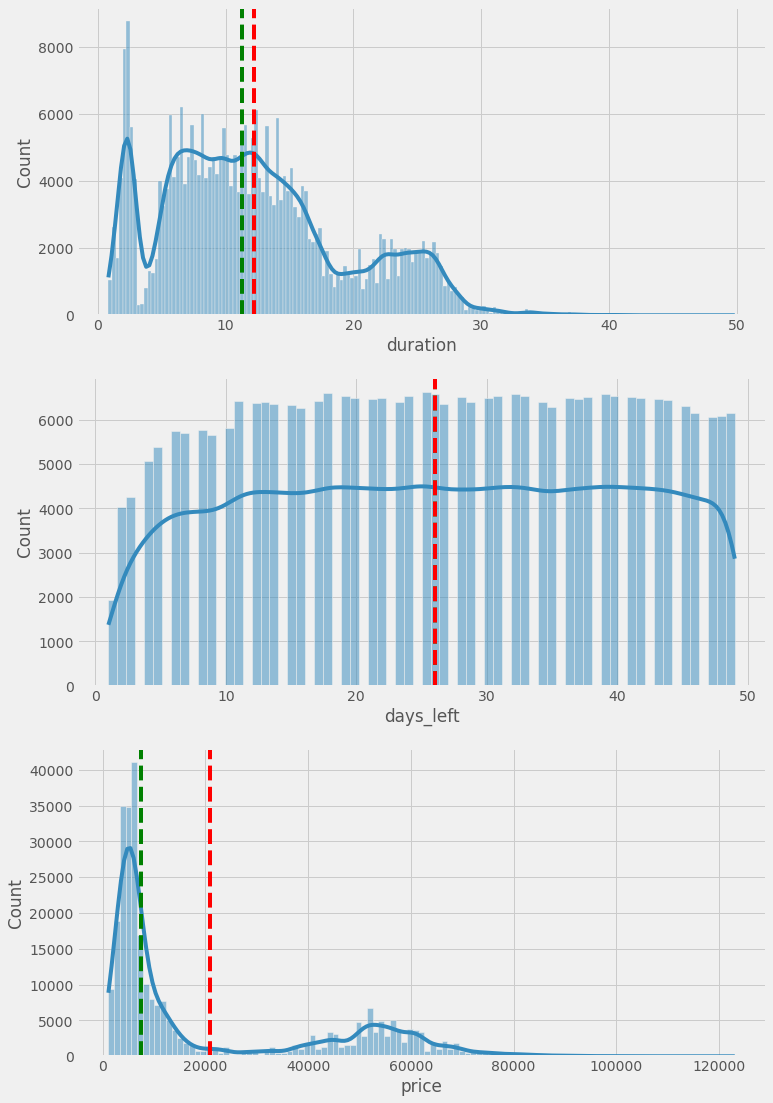

In [102]:
# plot histplots for numerical variables
fig, ax = plt.subplots(3,1,figsize=(11,18));
ax=ax.flatten();
j=0

for i in num_cols:
    sns.histplot(df[i],ax=ax[j], kde="True");
    ax[j].axvline(df[i].median(),ls='--',c="g");
    ax[j].axvline(df[i].mean(),ls='--',c="r");
    j+=1 

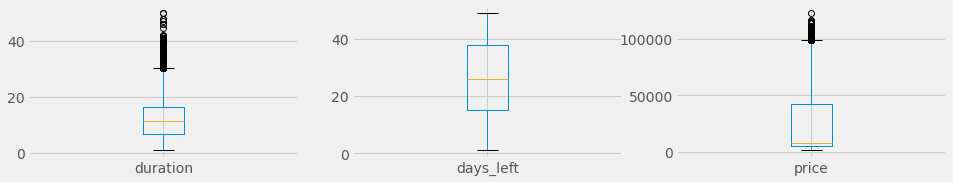

In [103]:
df.plot(kind ="box",subplots=True,figsize=(25,15),layout=(5,5));

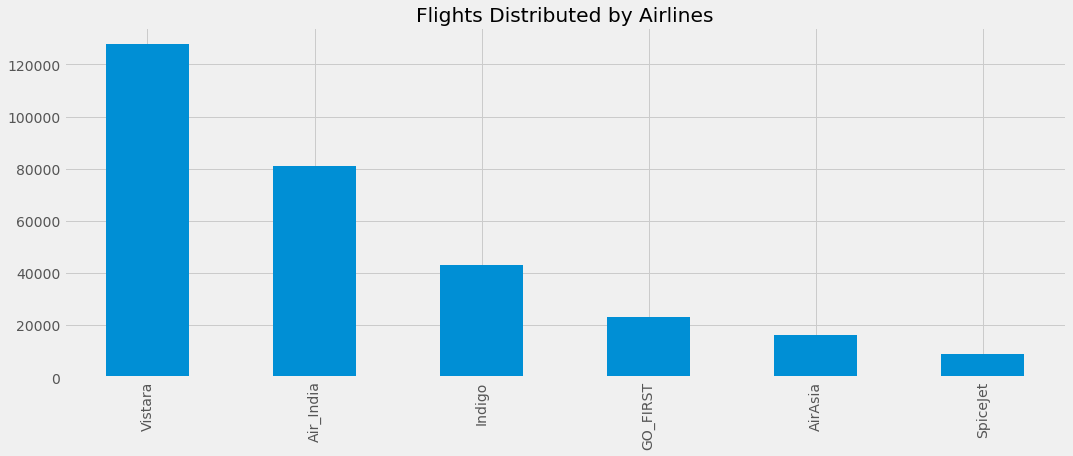

In [104]:
plt.figure(figsize=(16,6))
plt.title("Flights Distributed by Airlines")
df["airline"].value_counts().plot(kind ="bar");

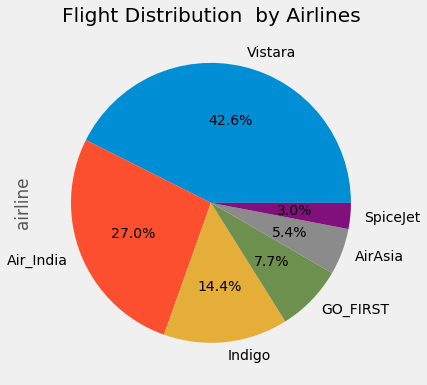

In [105]:
plt.figure(figsize=(16,6))
plt.title("Flight Distribution  by Airlines")
df["airline"].value_counts().plot(kind ="pie",autopct='%1.1f%%');

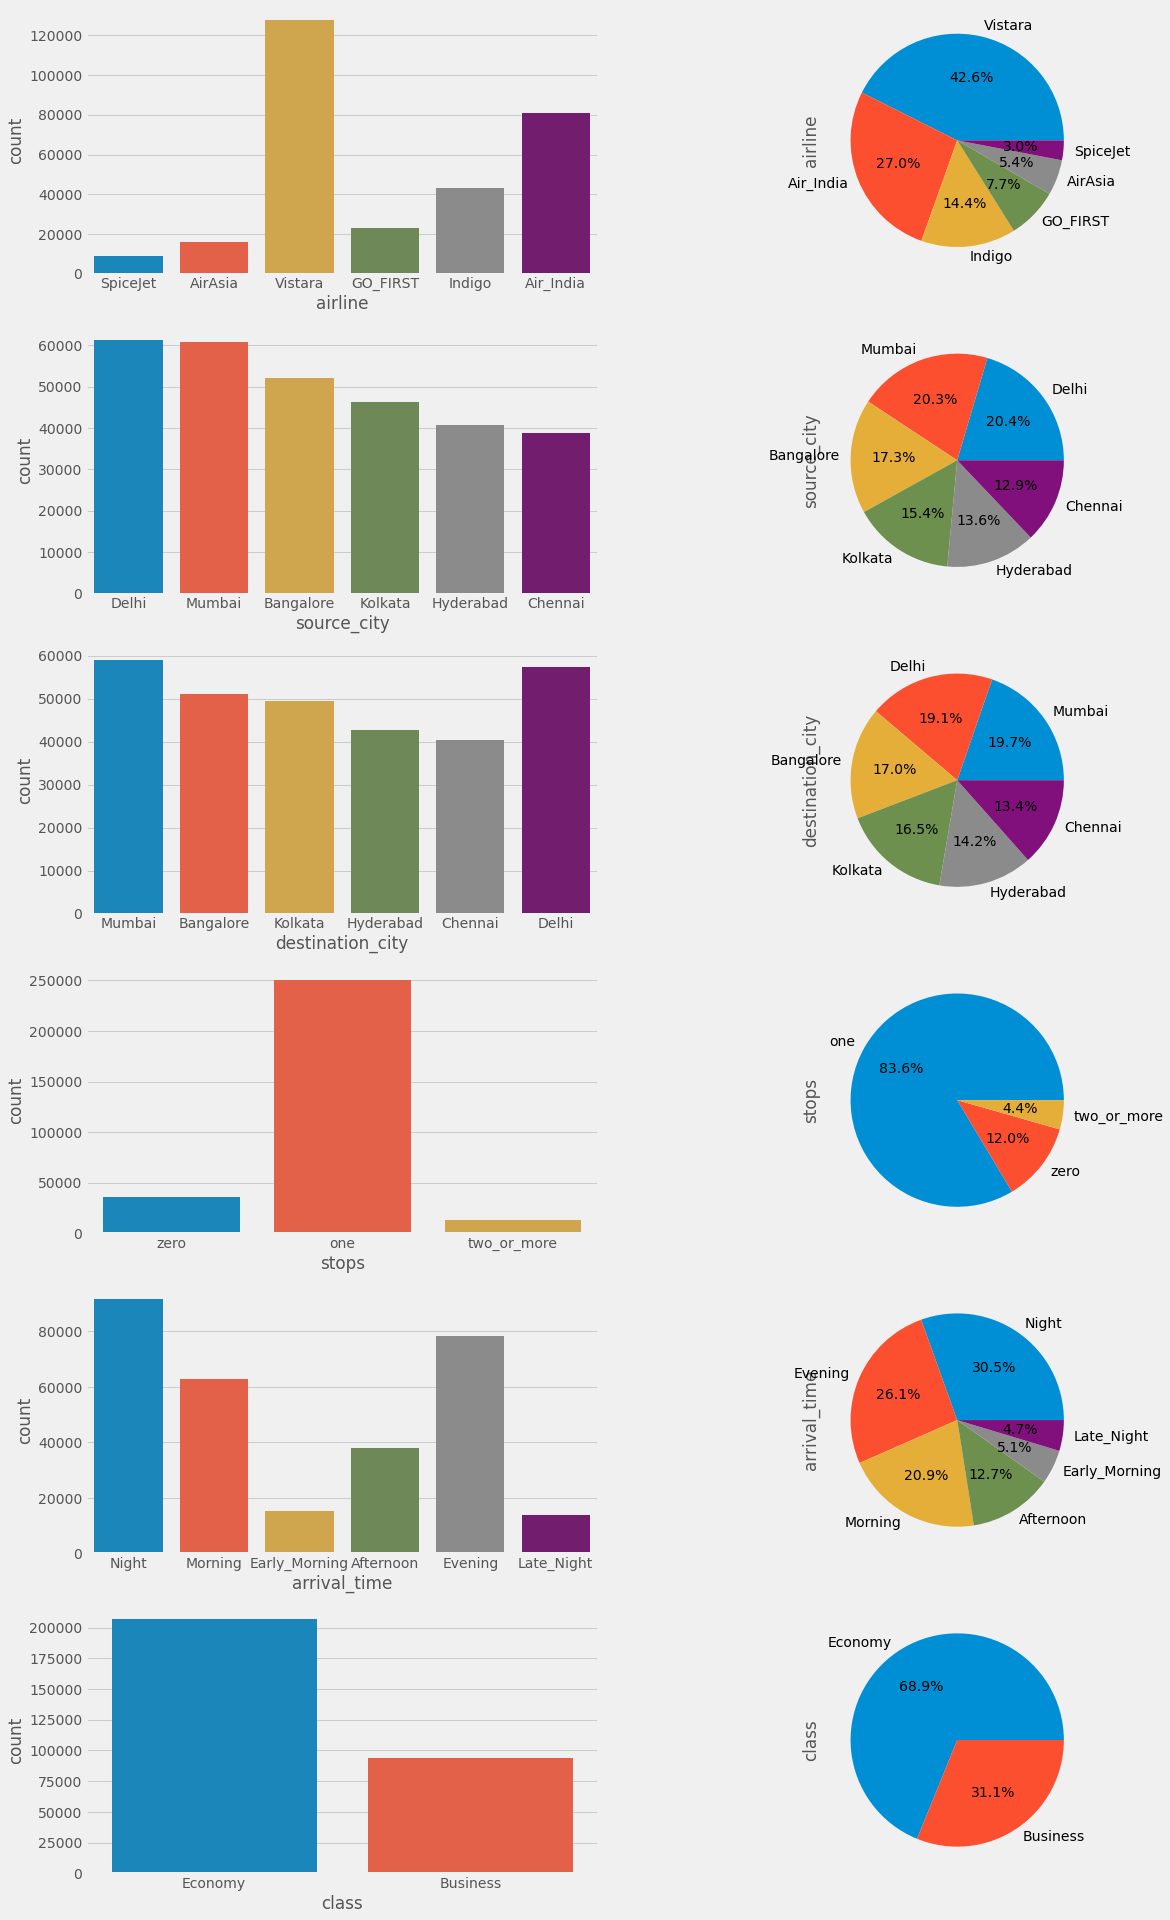

In [106]:
# plot countplots for categorical variables
fig, ax = plt.subplots(6,2,figsize=(18,32));
ax=ax.flatten();
j=0

for i in cat_cols:
    sns.countplot(df[i],ax=ax[j]);
    df[i].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[j+1]);
    j+=2

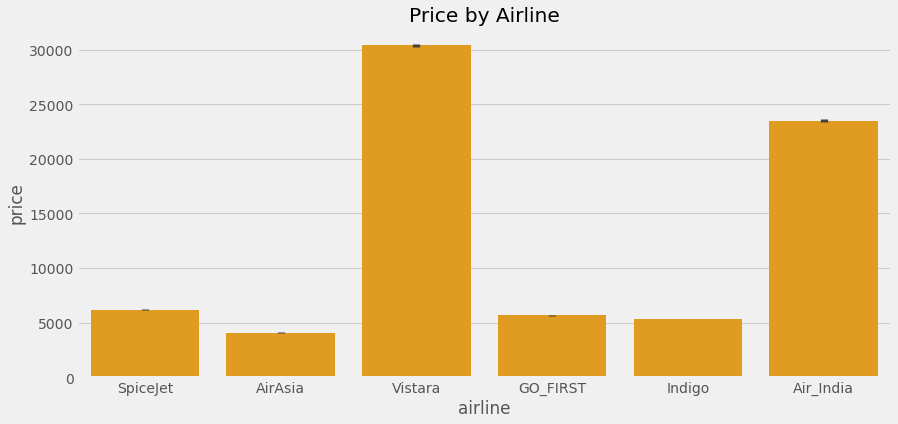

In [107]:
plt.figure(figsize=(13,6))
plt.title("Price by Airline")
sns.barplot(x="airline", y="price",color="Orange",data=df);
plt.show()

In [108]:
top=df["airline"].value_counts()

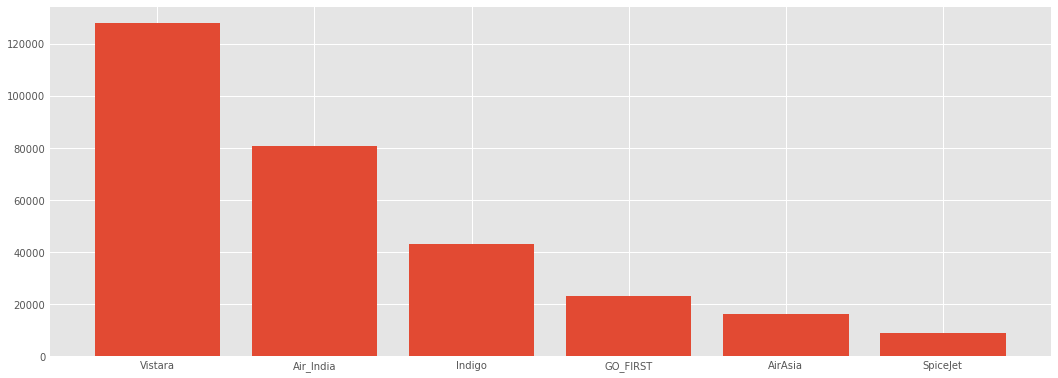

In [109]:
plt.style.use("ggplot")
plt.figure(figsize=(16,6))
plt.bar(top.index,top.values)
plt.show()

In [110]:
numeric_df = df.select_dtypes(include=['number'])

In [112]:
df.tail(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [113]:
a=list()
for i in range(300153):
    a.append(df["airline"][i])

In [114]:
hedef1={"hedef1":a}

In [115]:
hedef1=pd.DataFrame(hedef1)

In [116]:
hedef1

,hedef1
0,SpiceJet
1,SpiceJet
2,AirAsia
3,Vistara
4,Vistara
...,...
300148,Vistara
300149,Vistara
300150,Vistara
300151,Vistara


In [117]:
numeric_df["airline"]=hedef1

In [118]:
numeric_df

,duration,days_left,price,airline
0,2.17,1,5953,SpiceJet
1,2.33,1,5953,SpiceJet
2,2.17,1,5956,AirAsia
3,2.25,1,5955,Vistara
4,2.33,1,5955,Vistara
...,...,...,...,...
300148,10.08,49,69265,Vistara
300149,10.42,49,77105,Vistara
300150,13.83,49,79099,Vistara
300151,10.00,49,81585,Vistara


In [120]:
air_mean=numeric_df.groupby(by="airline").mean()

In [121]:
air_mean

,duration,days_left,price
airline,,,
AirAsia,8.941714,27.735184,4091.072742
Air_India,15.504235,25.497466,23507.019112
GO_FIRST,8.755380,27.430415,5652.007595
Indigo,5.795197,26.264309,5324.216303
SpiceJet,12.579767,24.122850,6179.278881
Vistara,13.326634,25.894532,30396.536302


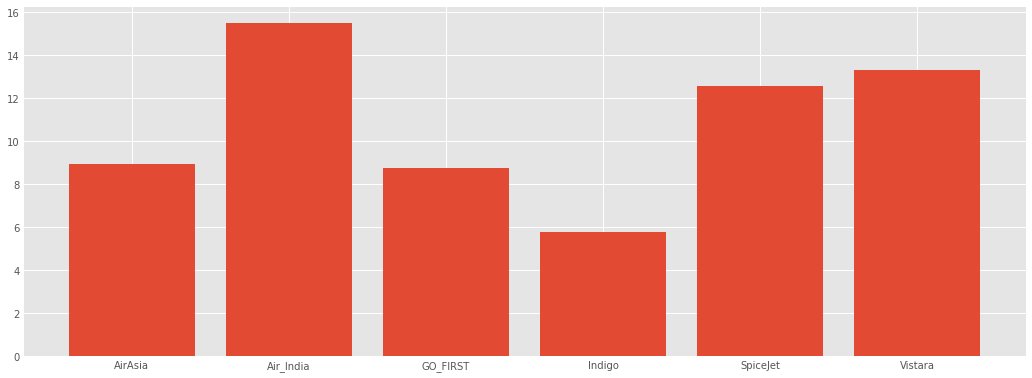

In [122]:
plt.style.use("ggplot")
plt.figure(figsize=(16,6))
plt.bar(air_mean.index,air_mean["duration"])
plt.show()

In [123]:
city=df["source_city"].value_counts()

In [124]:
city

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

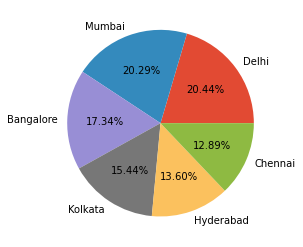

In [125]:
plt.pie(city.values,labels=city.index,autopct="%1.2f%%")
plt.show()

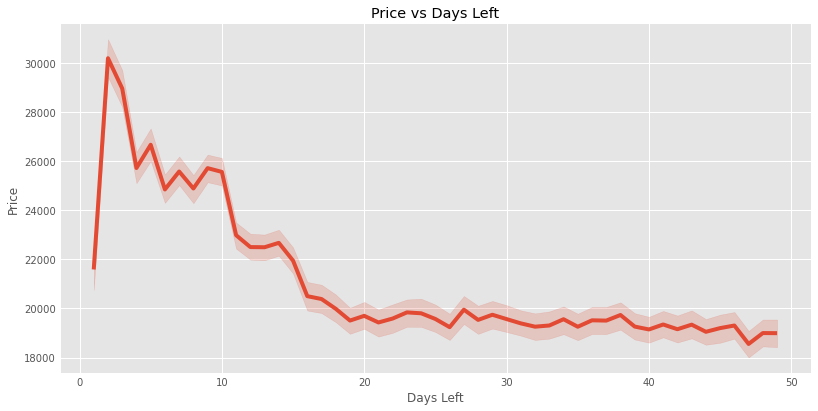

In [127]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='days_left', y='price', data=df)
plt.title('Price vs Days Left')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()

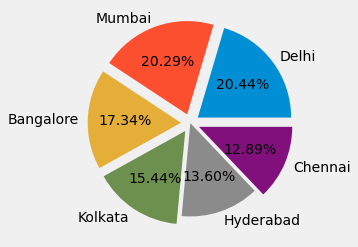

In [128]:
plt.style.use("fivethirtyeight")
plt.pie(city.values,labels=city.index,autopct="%1.2f%%",explode=[0.1,0.1,0.1,0.1,0,0.1])
plt.show()

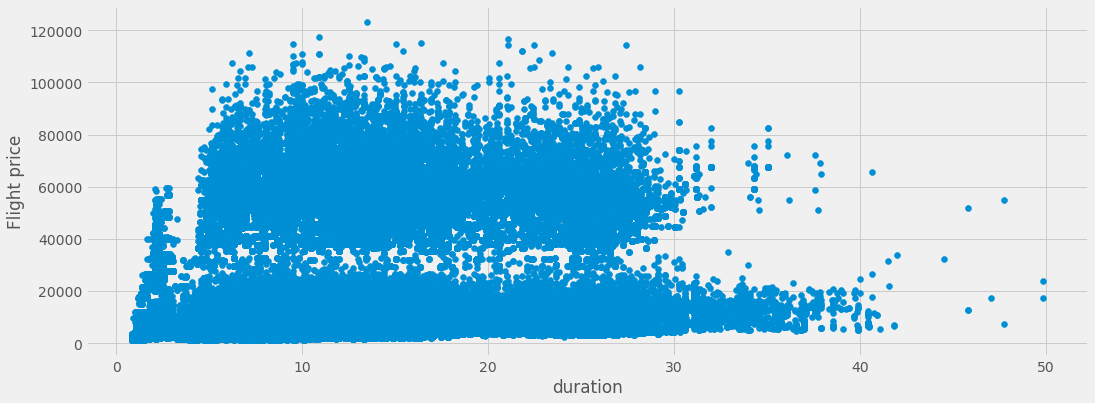

In [129]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,6))
plt.scatter(df["duration"],df["price"])
plt.xlabel("duration")
plt.ylabel("Flight price")
plt.show()

In [130]:
df=df.drop(["flight"],axis=1)

In [131]:
df["duration"]=df["duration"].astype(int)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  object
 1   source_city       300153 non-null  object
 2   departure_time    300153 non-null  object
 3   stops             300153 non-null  object
 4   arrival_time      300153 non-null  object
 5   destination_city  300153 non-null  object
 6   class             300153 non-null  object
 7   duration          300153 non-null  int32 
 8   days_left         300153 non-null  int64 
 9   price             300153 non-null  int64 
dtypes: int32(1), int64(2), object(7)
memory usage: 21.8+ MB


In [133]:
df=pd.get_dummies(df,columns=["airline","source_city","departure_time","stops","arrival_time","destination_city","class"],drop_first=True)

In [134]:
df.corr()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
duration,1.000000,-0.039206,0.205079,0.276124,-0.139994,-0.365838,0.008352,0.134154,0.032869,-0.048764,...,0.033605,-0.107231,0.121964,-0.064201,0.060798,-0.114467,0.066452,0.061827,-0.044618,-0.139375
days_left,-0.039206,1.000000,-0.091949,-0.022721,0.030408,0.007839,-0.024414,-0.007002,0.002581,-0.001292,...,-0.013737,0.026500,-0.003619,-0.004593,0.000456,0.006233,-0.000018,-0.003840,-0.004337,0.013039
price,0.205079,-0.091949,1.000000,0.070041,-0.194179,-0.280882,-0.114019,0.360816,0.018742,-0.043282,...,0.056408,-0.093602,0.030379,0.020344,0.018473,-0.052527,-0.008292,0.020956,0.010533,-0.937860
airline_Air_India,0.276124,-0.022721,0.070041,1.000000,-0.175687,-0.248781,-0.106858,-0.523242,-0.011600,0.009886,...,-0.040356,-0.059937,0.066735,-0.001920,0.005760,-0.017354,0.010900,-0.006201,0.042490,-0.124899
airline_GO_FIRST,-0.139994,0.030408,-0.194179,-0.175687,1.000000,-0.118471,-0.050886,-0.249171,-0.063273,0.030585,...,-0.043881,0.100450,-0.063926,-0.000382,-0.059581,0.034305,-0.025814,-0.001016,0.026916,0.194540
airline_Indigo,-0.365838,0.007839,-0.280882,-0.248781,-0.118471,1.000000,-0.072057,-0.352838,0.033626,-0.012615,...,0.007335,0.065025,-0.082781,-0.009271,0.018089,-0.002593,0.000244,0.033801,-0.031242,0.275477
airline_SpiceJet,0.008352,-0.024414,-0.114019,-0.106858,-0.050886,-0.072057,1.000000,-0.151553,0.003331,0.033040,...,-0.042162,0.003302,0.030808,0.013312,-0.002283,0.040668,-0.050272,0.029817,-0.000058,0.118325
airline_Vistara,0.134154,-0.007002,0.360816,-0.523242,-0.249171,-0.352838,-0.151553,1.000000,0.031174,-0.046163,...,0.091317,-0.135247,0.030260,0.024874,0.027766,-0.038389,0.035434,-0.030555,-0.016810,-0.302116
source_city_Chennai,0.032869,0.002581,0.018742,-0.011600,-0.063273,0.033626,0.003331,0.031174,1.000000,-0.194991,...,0.016559,0.009136,-0.024027,0.004418,-0.151660,0.060364,0.016905,0.015972,0.042960,-0.010204
source_city_Delhi,-0.048764,-0.001292,-0.043282,0.009886,0.030585,-0.012615,0.033040,-0.046163,-0.194991,1.000000,...,-0.025908,-0.028147,0.003773,-0.007427,0.061265,-0.246344,0.014093,0.040300,0.066721,0.014098


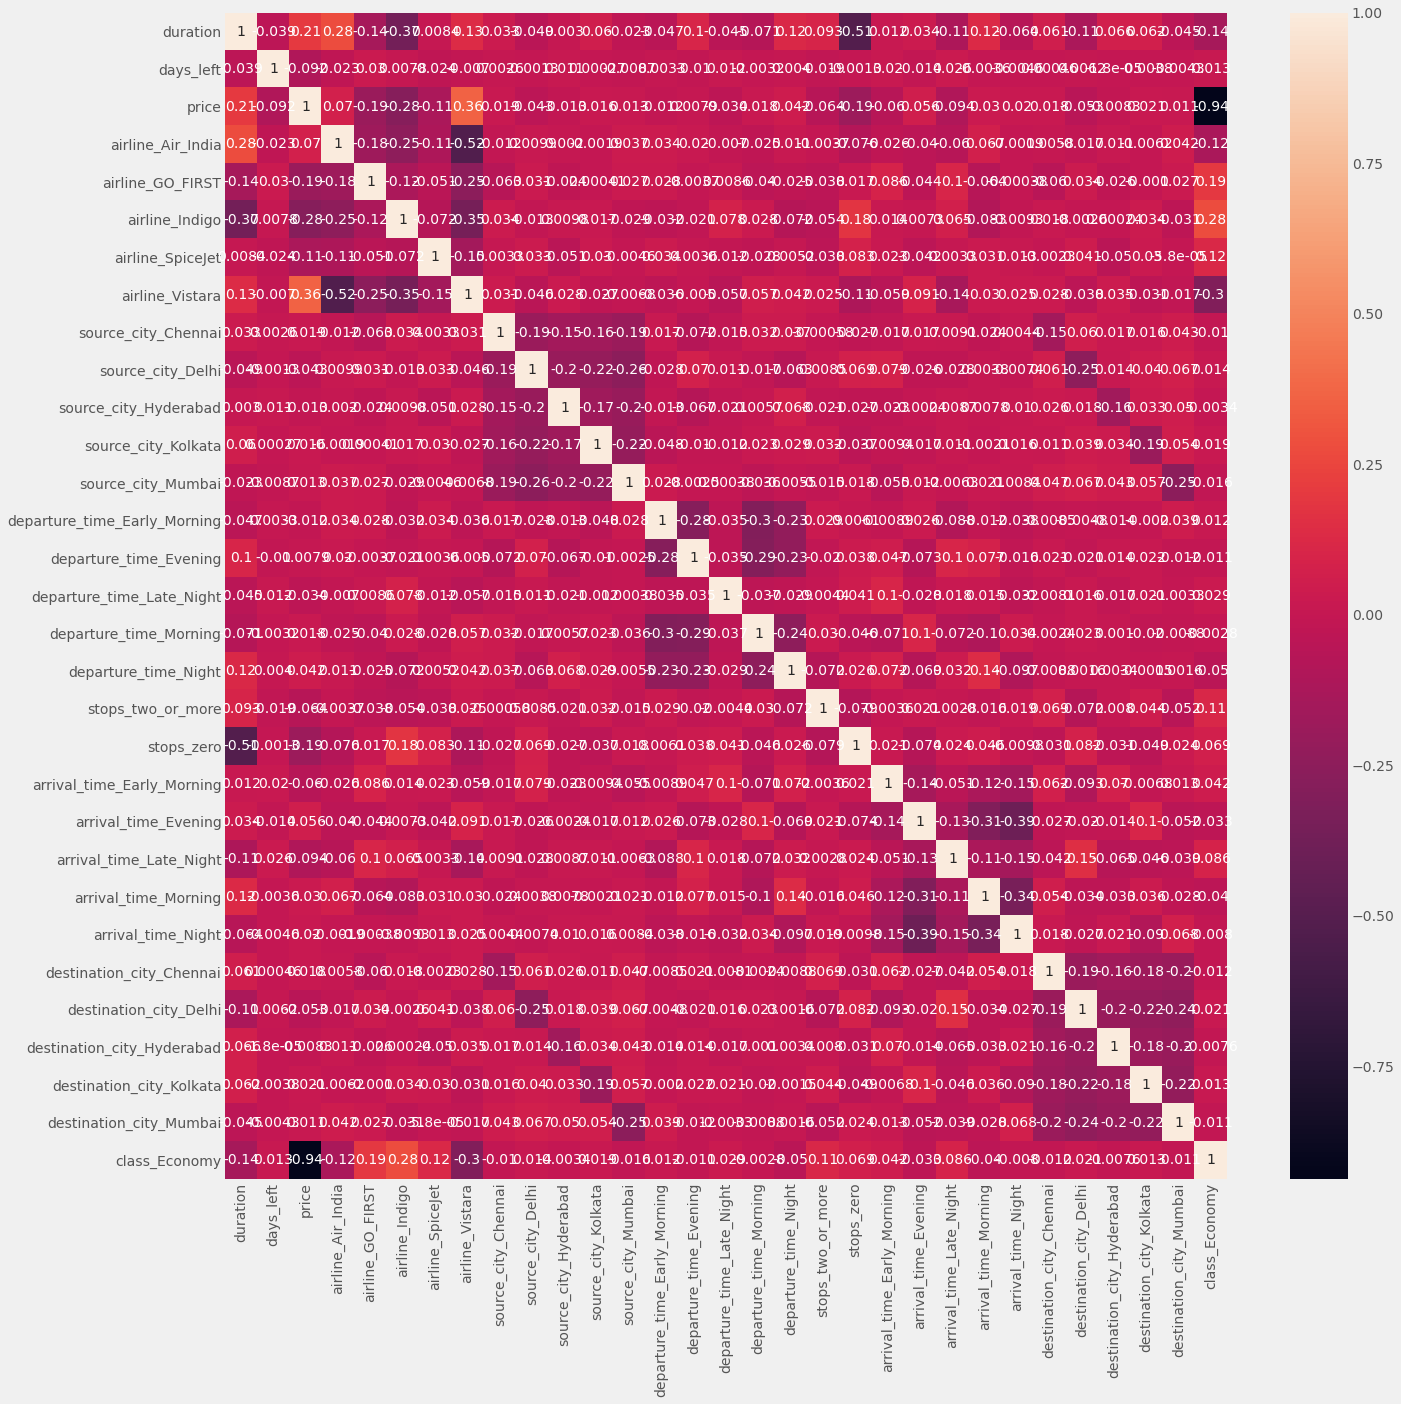

In [135]:
plt.figure(figsize=(20,20)) 
sns.heatmap(df.corr(),annot=True);

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   duration                      300153 non-null  int32
 1   days_left                     300153 non-null  int64
 2   price                         300153 non-null  int64
 3   airline_Air_India             300153 non-null  uint8
 4   airline_GO_FIRST              300153 non-null  uint8
 5   airline_Indigo                300153 non-null  uint8
 6   airline_SpiceJet              300153 non-null  uint8
 7   airline_Vistara               300153 non-null  uint8
 8   source_city_Chennai           300153 non-null  uint8
 9   source_city_Delhi             300153 non-null  uint8
 10  source_city_Hyderabad         300153 non-null  uint8
 11  source_city_Kolkata           300153 non-null  uint8
 12  source_city_Mumbai            300153 non-null  uint8
 13  departure_time

In [137]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [138]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [139]:
df.head()

,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,0.040816,0.0,0.039749,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,1
1,0.040816,0.0,0.039749,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,1
2,0.040816,0.0,0.039773,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,0.040816,0.0,0.039765,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,1
4,0.040816,0.0,0.039765,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,1


In [140]:
x=df.drop("price",axis=1)
y=df["price"]

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=23,train_size=0.85)

In [142]:
reg=LinearRegression()
model=reg.fit(x_train,y_train)

In [143]:
model.score(x_test,y_test)

0.9108310216586716

In [146]:
regr_ridge=Ridge()
model1=regr_ridge.fit(x_train,y_train)

In [147]:
model1.score(x_test,y_test)

0.910831160566863

In [148]:
regr_lasso=Lasso()
model2=regr_lasso.fit(x_train,y_train)

In [ ]:
model2.score(x_test,y_test)

In [154]:
x_test

,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
18541,0.571429,0.854167,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
50676,0.122449,0.791667,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
88448,0.142857,0.458333,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
80088,0.122449,0.437500,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
193761,0.020408,1.000000,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90620,0.081633,0.666667,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
276568,0.040816,0.750000,0,0,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
206522,0.142857,0.979167,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
52419,0.040816,0.979167,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [150]:
from sklearn import metrics

#make prediction
pred=model.predict(x_test)
print("\nMean Absolute Error:",metrics.mean_absolute_error(y_test,pred))
from sklearn.metrics import r2_score
print("\nR2_Score:",r2_score(y_test, pred))
#
# Adj. R2 Score
factor = (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
AdjR2=1-(1-r2_score(y_test,pred))*factor
print("\nAdjR2_Score:",AdjR2)


Mean Absolute Error: 0.03725127568058665

R2_Score: 0.9108310216586716

AdjR2_Score: 0.9107715651030563
